#  Genetic Toggle Switch

![genetic-toggle-switch](../pics/genetic-toggle-switch.png)
$\left\{
\begin{array}{l}
\dot{x} = \frac{\alpha_1}{1 + \left(\frac{y}{K_1}\right)^{n_1}} - \gamma_1 x
\\
 \dot{y} = \frac{\alpha_2}{1 + \left(\frac{x}{K_2}\right)^{n_2}} - \gamma_2 y
\end{array}
\right.$

In [1]:
# this makes sure it starts looking for things from the top folder down.
import os
import sys
os.chdir('../')
sys.path.insert(0,os.getcwd())
print(os.getcwd())

C:\Users\rrtuc\Desktop\backed-up\python-projects\ode_to_odes


In [2]:
from ode_helpers import *

In [3]:
def f(t, y, c):
    ydot = [c[0]/(1+(y[1]/c[1])**c[2]) - c[3]*y[0], 
            c[4]/(1+(y[0]/c[5])**c[6]) - c[7]*y[1]]
    return ydot

def dx_dt(x, y):
    return f(0, (x, y), c)[0]
    
def dy_dt(x, y):
    return f(0, (x, y), c)[1]


alpha1, alpha2 = (2, 2)
K1, K2 = (1, 1)
n1, n2= (2.5, 2.5)
gamma1, gamma2 = (1, 1)
c = (alpha1, K1, n1, gamma1, 
     alpha2, K2, n2, gamma2)

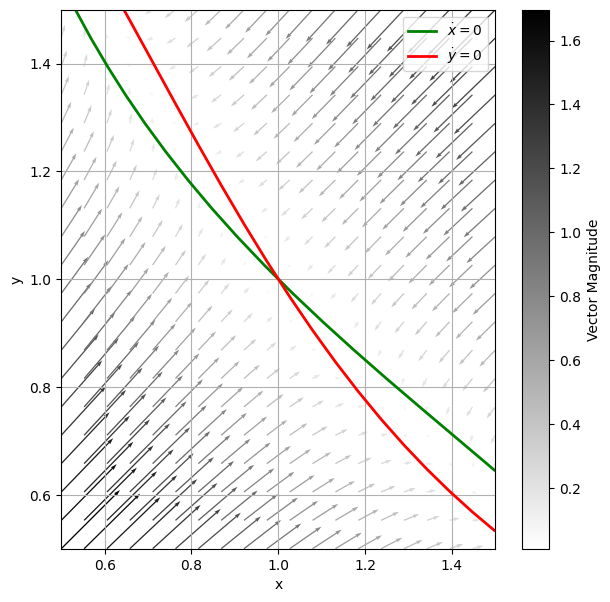

In [4]:
plot_phase_plane(dx_dt,
                 dy_dt,
                 x_range=(.5, 1.5),
                 y_range=(.5, 1.5),
                 density=20,
                 scale=10
                 # %trajectories=[(2, 0), (-2, 1), (0, -2)]
                 )

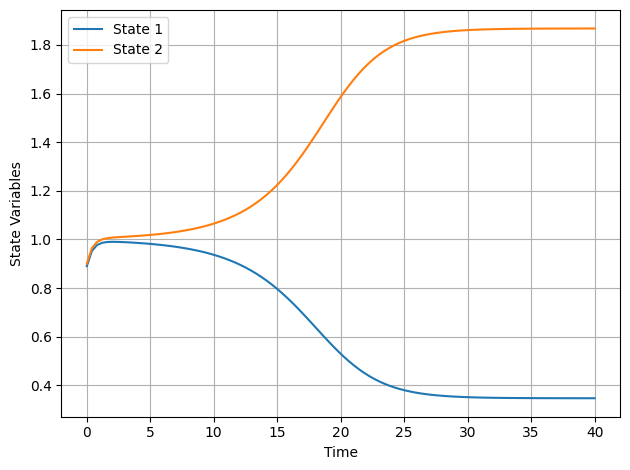

In [5]:
tspan = np.linspace(0, 40, 100)
yinit = [.89, .9]
sol = solve_ivp(lambda t,
                y: f(t, y, c),
                [tspan[0], tspan[-1]],
                yinit,
                t_eval=tspan,
                rtol = 1e-5)

state_plotter(sol.t, sol.y)

In [6]:
alpha1, alpha2 = (1, 1)
K1, K2 = (.7,.7)
n1, n2= (4, 4)
gamma1, gamma2 = (1, 1)
c = (alpha1, K1, n1, gamma1, 
     alpha2, K2, n2, gamma2)

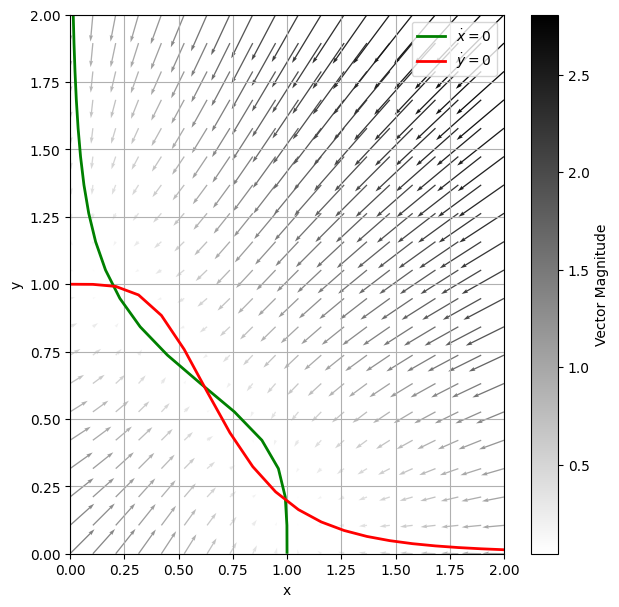

In [7]:
plot_phase_plane(dx_dt,
                 dy_dt,
                 x_range=(0, 2),
                 y_range=(0, 2),
                 density=20,
                 scale=10
                 # %trajectories=[(2, 0), (-2, 1), (0, -2)]
                 )

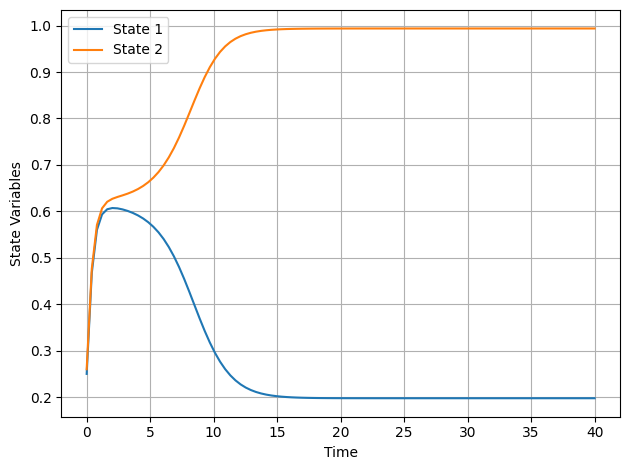

In [8]:
tspan = np.linspace(0, 40, 100)
yinit = [.25, .26]

sol = solve_ivp(lambda t,
                y: f(t, y, c),
                [tspan[0], tspan[-1]],
                yinit,
                t_eval=tspan,
                rtol = 1e-5)

state_plotter(sol.t, sol.y)